# Prácticas con fijos lineales

Los siguientes ejercicios con imágenes se realizan en un archivo de Jupyter Notebook, usando Python 3.8 y las siguientes librerías, como se puede observar en los _imports_:
* `open-cv`
* `matplotlib`

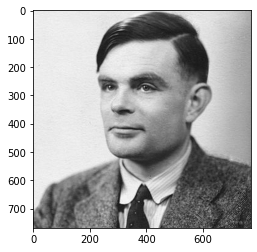

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2

image = cv2.imread('alan_turing.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, 'gray');
# imagen que se usará para aplicar los filtros:

## _Mean filtering_

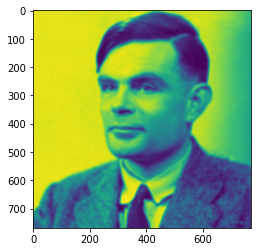

In [26]:
import cv2

# aplicar ventana de 10x10
mean3 = cv2.blur(image, (10, 10))
plt.imshow(mean3, 'gray');

## _Sharpening_

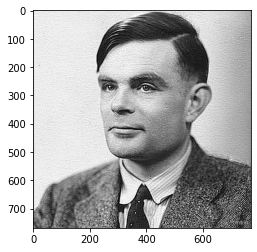

In [30]:
import numpy as np

kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
sharpened = cv2.filter2D(image, -5, kernel)
plt.imshow(sharpened, 'gray');